# 07-More Derivatives
Non-steady state scenarios occur all around us: heating up your cold hands, warming up your food, filling your washing machine, among a myriad of other examples. There's also many non-steady state scenarios in chemical engineering: filling a tank, heating up a reactor, cooling down a reactor, etc. In this lecture, we will get more practice setting up the problem and estimating a solution.

You should further understand at the end of this discussion that if you have an expression for the derivative, you can integrate that numerically to determine the system parameters as a function of time. 

## First Example: Carbon Dioxide Concentration

<img src='https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/terrarium.jpg?raw=true' size='200'>

Now we'll compare the result to a real scenario of carbon dioxide concentration inside a small terrarium. The terrarium is completely closed.

In [2]:
#import needed packages
import pandas as pd
#read in the data
df = pd.read_csv('supportfiles/co2concterr.txt', sep='\t', header=9)


In [3]:
df.tail()

,Epoch_UTC,Local_Date_Time,T,RH,CO₂,DP,AH,HI,MR
61459,1.687909e+09,2023-06-27T17:42:19.779569,27.572,90.44,15974.0,25.864,23.97,32.807,21.402
61460,1.687909e+09,2023-06-27T17:42:19.861700,27.572,90.44,15974.0,25.864,23.97,32.807,21.402
61461,1.687909e+09,2023-06-27T17:42:19.865171,27.572,90.44,15974.0,25.864,23.97,32.807,21.402
61462,1.687909e+09,2023-06-27T17:42:19.943573,27.572,90.44,15974.0,25.864,23.97,32.807,21.402
61463,1.687909e+09,2023-06-27T17:42:19.947163,27.572,90.44,15974.0,25.864,23.97,32.807,21.402


In [4]:
#add an extra column to the dataframe that is the seconds from the start of the data from the 
# Epoch_UTC column
df['min'] = df.index*10 #min
#now reference from the start of the data
df['min'] = df['min'] - df['min'].iloc[-594]

In [5]:
df.iloc[-594]

Epoch_UTC                        1687880366.8
Local_Date_Time    2023-06-27T09:39:26.827185
T                                      25.801
RH                                      92.05
CO₂                                    2627.0
DP                                      24.41
AH                                     22.113
HI                                      26.84
MR                                     19.572
min                                         0
Name: 60870, dtype: object

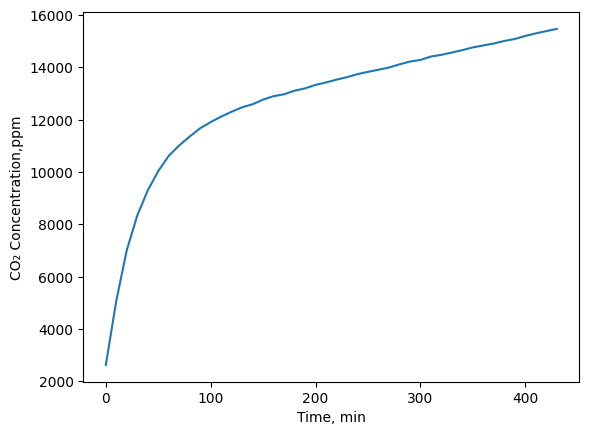

In [6]:
#plot the last custom amount of rows in the dataframe for the CO2 column
import matplotlib.pyplot as plt
#df['CO₂'].iloc[-594:-550].plot()
plt.plot(df['min'].iloc[-594:-550],df['CO₂'].iloc[-594:-550])
plt.xlabel('Time, min'), plt.ylabel('CO₂ Concentration,ppm')
plt.show()

## Second Example: Cooling a Reactor